In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from glob import glob 
import re
import os 

In [2]:
def read(file_path,model:str,encoder:str):
    # 1. 从txt文件中读取内容
    # file_path = "../exp/encoder_com/steatosis/abmil/uni/log_metric.txt"  # 替换为你的文件路径
    with open(file_path, "r", encoding="utf-8") as file:
        lines = [line.strip() for line in file.readlines() if line.strip()]

    # 2. 提取表头和有效数据行
    header = ['FOLD','ACC','AUC','Kappa','F1','Precision','Recall']  # 提取表头
    data_lines = lines  # 跳过表头和分隔行（例如"|---|---|..."）

    # 3. 正则表达式提取数值
    pattern = r"(\d+\.\d+)"  # 匹配浮点数
    processed_data = []
    for line in data_lines:
        # 提取FOLD编号和所有指标数值
        parts = line.split(",")  # 去除首尾空列
        fold_number = re.search(r"FOLD: (\d+)", parts[0]).group(1)
        values = [re.search(pattern, col).group(1) for col in parts]
        processed_data.append([fold_number] + values)

    # 4. 创建DataFrame并转换类型
    columns = ["Fold"] + header[1:]  # 列名：Fold, ACC, AUC, Kappa, F1, Precision, Recall
    df = pd.DataFrame(processed_data, columns=columns)
    df = df.apply(pd.to_numeric)  # 转换为数值类型
    df['classifier'] = [model]*len(df)
    df['encoder'] = [encoder]*len(df)
    return df

In [25]:
all_dfs = []
for i in glob('../exp/encoder_com/nas/*/*/log_metric.txt'):
    classifier,encoder = i.split(os.sep)[-3:-1]
    print(i, classifier, encoder)
    df = read(i,classifier,encoder)
    all_dfs.append(df)
combined_df = pd.concat(all_dfs, axis=0, ignore_index=True)
combined_df

../exp/encoder_com/nas/max/uni/log_metric.txt max uni
../exp/encoder_com/nas/max/giga/log_metric.txt max giga
../exp/encoder_com/nas/max/conch/log_metric.txt max conch
../exp/encoder_com/nas/mamba/uni/log_metric.txt mamba uni
../exp/encoder_com/nas/mamba/giga/log_metric.txt mamba giga
../exp/encoder_com/nas/mamba/conch/log_metric.txt mamba conch
../exp/encoder_com/nas/wikg/uni/log_metric.txt wikg uni
../exp/encoder_com/nas/wikg/giga/log_metric.txt wikg giga
../exp/encoder_com/nas/wikg/conch/log_metric.txt wikg conch
../exp/encoder_com/nas/mean/uni/log_metric.txt mean uni
../exp/encoder_com/nas/mean/giga/log_metric.txt mean giga
../exp/encoder_com/nas/mean/conch/log_metric.txt mean conch
../exp/encoder_com/nas/abmil/uni/log_metric.txt abmil uni
../exp/encoder_com/nas/abmil/giga/log_metric.txt abmil giga
../exp/encoder_com/nas/abmil/conch/log_metric.txt abmil conch


,Fold,ACC,AUC,Kappa,F1,Precision,Recall,classifier,encoder
0,0,0.740741,0.541477,0.000000,0.283688,0.246914,0.333333,max,uni
1,1,0.759259,0.474066,0.000000,0.287719,0.253086,0.333333,max,uni
2,2,0.851852,0.802845,0.642807,0.645728,0.722898,0.583444,max,uni
3,3,0.712963,0.494924,0.000000,0.277477,0.237654,0.333333,max,uni
4,4,0.813084,0.517313,0.000000,0.298969,0.271028,0.333333,max,uni
...,...,...,...,...,...,...,...,...,...
70,0,0.759259,0.774254,0.453490,0.609122,0.769663,0.503996,abmil,conch
71,1,0.851852,0.921302,0.850519,0.726468,0.750817,0.703648,abmil,conch
72,2,0.777778,0.792213,0.547823,0.569819,0.597933,0.544231,abmil,conch
73,3,0.824074,0.872860,0.614542,0.683470,0.795455,0.599124,abmil,conch


In [4]:
all_dfs = []
for i in glob('../exp/mil/nasc/steatosis/*/log_metric.txt'):
    classifier,encoder = i.split(os.sep)[-2], 'uni'
    print(i, classifier, encoder)
    df = read(i,classifier,encoder)
    all_dfs.append(df)

../exp/mil/nasc/steatosis/diff_soft_0.4/log_metric.txt diff_soft_0.4 uni
../exp/mil/nasc/steatosis/diff_soft_0.2/log_metric.txt diff_soft_0.2 uni
../exp/mil/nasc/steatosis/diff_soft_0.3/log_metric.txt diff_soft_0.3 uni
../exp/mil/nasc/steatosis/diff_soft_0.5/log_metric.txt diff_soft_0.5 uni
../exp/mil/nasc/steatosis/diff_soft/log_metric.txt diff_soft uni
../exp/mil/nasc/steatosis/diff/log_metric.txt diff uni
../exp/mil/nasc/steatosis/diff_soft_1.5/log_metric.txt diff_soft_1.5 uni
../exp/mil/nasc/steatosis/diff_soft_1.25/log_metric.txt diff_soft_1.25 uni
../exp/mil/nasc/steatosis/diff_soft_0.75/log_metric.txt diff_soft_0.75 uni


In [5]:
combined_df = pd.concat(all_dfs, axis=0, ignore_index=True)
combined_df

,Fold,ACC,AUC,Kappa,F1,Precision,Recall,classifier,encoder
0,0,0.833333,0.961956,0.881232,0.877386,0.894658,0.860768,diff_soft_0.4,uni
1,1,0.879630,0.955448,0.930024,0.879854,0.898841,0.861652,diff_soft_0.4,uni
2,2,0.805556,0.948519,0.877113,0.804180,0.791832,0.816919,diff_soft_0.4,uni
3,3,0.833333,0.959705,0.902634,0.820591,0.830208,0.811194,diff_soft_0.4,uni
4,0,0.805556,0.965715,0.884568,0.812646,0.769521,0.860891,diff_soft_0.4,uni
...,...,...,...,...,...,...,...,...,...
75,0,0.796296,0.929947,0.862117,0.810795,0.811322,0.810270,diff_soft_0.75,uni
76,1,0.861111,0.977251,0.919162,0.876474,0.907197,0.847763,diff_soft_0.75,uni
77,2,0.833333,0.947647,0.876766,0.843878,0.840559,0.847222,diff_soft_0.75,uni
78,3,0.842593,0.964590,0.909145,0.840590,0.847222,0.834061,diff_soft_0.75,uni


In [20]:
combined_df.groupby('classifier').aggregate('mean')

,Fold,ACC,AUC,Kappa,F1,Precision,Recall
classifier,,,,,,,
diff,2.0,0.835185,0.954892,0.893857,0.836020,0.854014,0.818874
diff_soft,2.0,0.846296,0.950449,0.901775,0.835185,0.847879,0.823578
diff_soft_0.2,2.0,0.834259,0.950740,0.895986,0.836039,0.842226,0.831045
diff_soft_0.3,2.0,0.831481,0.952957,0.892368,0.825182,0.827977,0.823343
diff_soft_0.4,2.0,0.841667,0.958736,0.899609,0.839213,0.844067,0.835548
diff_soft_0.5,2.0,0.837037,0.953730,0.898108,0.841145,0.843786,0.839018
diff_soft_0.75,2.0,0.833333,0.947444,0.894230,0.835336,0.839089,0.831883
diff_soft_1.25,2.0,0.831481,0.950543,0.893591,0.827246,0.823196,0.831614
diff_soft_1.5,2.0,0.837963,0.953354,0.896658,0.840803,0.853645,0.829925


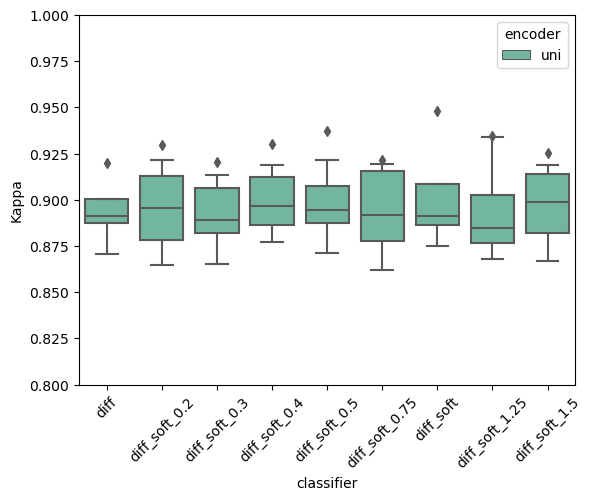

In [35]:
order = ['diff','diff_soft_0.2','diff_soft_0.3','diff_soft_0.4','diff_soft_0.5','diff_soft_0.75','diff_soft','diff_soft_1.25','diff_soft_1.5']
sns.boxplot(data=combined_df, 
            x="classifier", 
            y='Kappa', 
            hue="encoder", 
            # kind="bar",
            order=order,
            palette='Set2', whis=(0, 90)
            )
plt.ylim([0.8,1])
plt.xticks(rotation=45)
plt.show()

In [27]:
order = ['mean','max','abmil','mamba','wikg']
for i,j in zip(['ACC','AUC','Kappa','F1'],['acc','auc','kappa','f1']):
    sns.catplot(data=combined_df, 
                x="classifier", 
                y=i, 
                hue="encoder", 
                kind="bar",
                order=order,
                palette='Set2')
    # plt.xticks(['mean','max','abmil','mambamil','wikg'])
    plt.ylim([0,1])
    plt.savefig(f'./figures/f2-nas-{j}.svg')
    # plt.show()

In [24]:
order = ['mean','max','abmil','mamba','wikg','diff','diff_soft','diff_soft_0.2','diff_soft_0.3','diff_soft_0.4','diff_soft_0.5','diff_soft_0.75']

for i,j in zip(['ACC','AUC','Kappa','F1'],['acc','auc','kappa','f1']):
    sns.catplot(data=combined_df, 
                x="classifier", 
                y=i, 
                # hue="encoder", 
                kind="bar",
                order=order,
                palette='Set2')
    plt.ylim([0.8,1])
    plt.xticks(rotation=45)
    plt.savefig(f'./figures/f3-s-test-{j}-local.svg')

# plt.show()